1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  


In [1]:
import numpy as np
import numpy.random as random
random.seed(2011654)

Nt = 3000

Tl = 1000 # initial Tallium population
Pb = 0    # initial Lead population

dt  = 1        # time interval  [s]
tau = 3.052*60 # half-life time [s]

def is_Tl():
    rand = random.rand()
    if(rand < 2**(-dt/tau)):
        return 1
    else:
        return 0
    
def new_Tl_population(Tl):
    return np.array([is_Tl() for i in range(Tl)]).sum()
    
    
Tl_history = np.zeros(Nt,dtype=int)
Tl_history[0] = Tl

for i in range(1,Nt):
    Tl_history[i] = new_Tl_population(Tl_history[i-1])
    
Pb_history = Tl-Tl_history

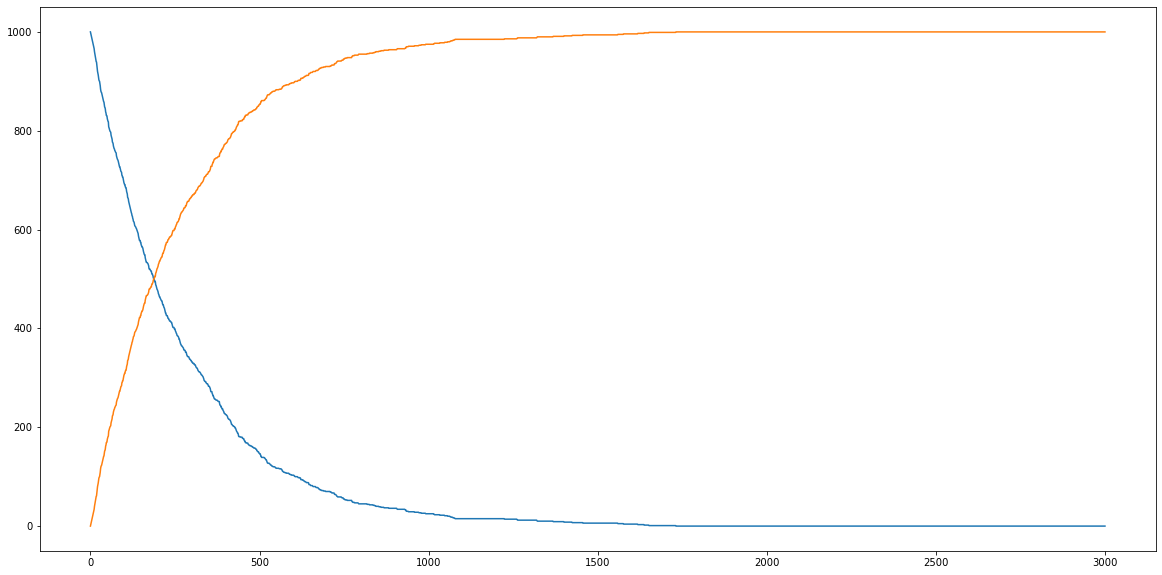

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=[20,10])

plt.plot(Tl_history)
plt.plot(Pb_history)

plt.show()

* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

The target PDF is $p(t) := \left(\frac{\log(2)}{\tau}\right)2^{-\frac{t}{\tau}}$. This distribution represents the probability, for a givet atom, not to be decayed for times $<t$, or the probability for it to be decaied at times $>t$. This is also the probability desity of decayng between time $t$ and $t+dt$.

The inverse transfotmation requres to solve for $t$ as a function of $x(t)$ the following integral equation:

$$ \int_0^{x(t)} dt' = \int_0^t  \left(\frac{\log(2)}{\tau}\right) 2^{-\frac{t'}{\tau}} dt' $$

which becomes:

$$ x(t) = 1-2^{-\frac{t}{\tau}} $$

Solving for $t$ as a function of $x$, one obtains:

$$ t(x) = -\tau\log_2(1-x) $$

so that, the transformation function that turns a set of $x$ drawn from uniform $[0,1]$ distribution, into a set of $t$ drawn from the $p(t)$ distribution is exactly the aformentioned $t(x)$.

In [8]:
N = 1000
t = -tau*np.log2(1-random.rand(N)) # drow samples from decaing-time distribution

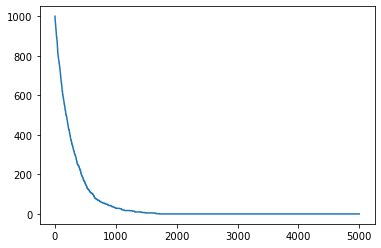

In [4]:
#1 superposition of one heaviside function for each sample (linear time spacing)
time_domain = np.linspace(0,5000,10000)

MG = np.meshgrid(time_domain,t)
Tl_history = (1-np.heaviside(MG[0]-MG[1],0.5)).sum(axis=0)
plt.plot(time_domain,Tl_history)

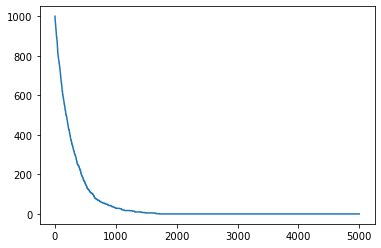

In [6]:
#2 counting values (linear time spacing)
time_domain = np.linspace(0,5000,10000)

MG = np.meshgrid(time_domain,t)
Tl_history = np.array([ len(t[t>td]) for td in time_domain])
plt.plot(time_domain,Tl_history)

(0.0, 5000.0)

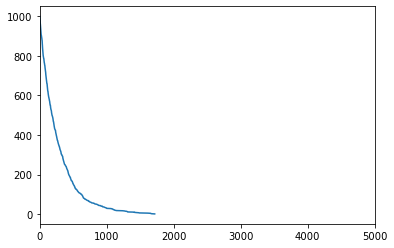

In [7]:
#3 cumulative count
t.sort()
plt.plot(t,np.arange(N,0,-1))
plt.xlim([0,5000])

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84